# Start by importing packages we'll need later

In [ ]:
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth

from PIL import Image
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from pprint import pprint
from google.colab import files
import regex as re
from ast import literal_eval
from collections import Counter
import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 12.8 MB/s eta 0:00:00


# Set up authentication details to pull info from Spotify API.

In [ ]:
with open('authentication.txt', 'r') as file:
    clID = file.readline().strip()
    secret = file.readline().strip()

cred_mgr = SpotifyClientCredentials(client_id=clID, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=cred_mgr)

# Trial run with a single album

Genres: ['contemporary country', 'outlaw country']
Album name: From A Room: Volume 1
Artist: Chris Stapleton
Image size: 300 x 300


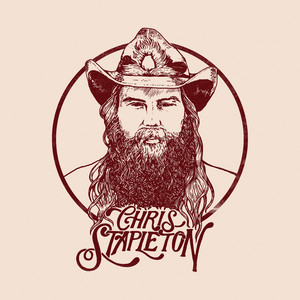

In [ ]:
test_uri = '5L0e8X6Mf9lfjs2miK2WUB'
album = sp.album(test_uri)
if album['genres'] == []:
    print(f"Genres: {sp.artist(album['artists'][0]['uri'])['genres']}")
else:
    print(f"Genres: {album['genres']}")
print(f"Album name: {album['name']}")
print(f"Artist: {album['artists'][0]['name']}")
urllib.request.urlretrieve(album['images'][1]['url'], 'test.jfif')
print(f"Image size: {album['images'][1]['height']} x {album['images'][1]['width']}")
img = Image.open('test.jfif')
img.show()

# Create dataframe of all Jukebox artists

In [ ]:
!gdown 1gUK2113e6HtCP-NZGnrecmh_y7N-IPc6
Jukebox_artists = pd.read_csv('Jukebox_artists.csv', sep=';', header=None, 
                              names=['Jukebox name', 'index'], index_col='index')
Jukebox_artists.drop(index=[0, 7896, 7897], inplace=True)
Jukebox_artists['Spotify name'] = ''
Jukebox_artists['Spotify URI'] = ''
Jukebox_artists.head()

Downloading...
From: https://drive.google.com/uc?id=1gUK2113e6HtCP-NZGnrecmh_y7N-IPc6
To: /content/Jukebox_artists.csv
100% 149k/149k [00:00<00:00, 81.0MB/s]


,Jukebox name,Spotify name,Spotify URI
index,,,
1,beat farmers,,
2,aaron sprinkle,,
3,dianne reeves,,
4,lowe,,
5,harry manx,,


# Match Jukebox artists to their Spotify names and URIs.

In [ ]:
for idx in range(1, Jukebox_artists.shape[0]):
    artist = Jukebox_artists.loc[idx]['Jukebox name']
    result = sp.search(q=artist, type='artist')['artists']['items'][0]
    spot = result['name']
    uri = result['uri']
    Jukebox_artists.loc[idx]['Spotify name'] = spot
    Jukebox_artists.loc[idx]['Spotify URI'] = uri
    if idx % 100 == 0:
        print(f'Done with {idx}')
Jukebox_artists

Done with 100
Done with 200
Done with 300
Done with 400
Done with 500
Done with 600
Done with 700
Done with 800
Done with 900
Done with 1000
Done with 1100
Done with 1200
Done with 1300
Done with 1400
Done with 1500
Done with 1600
Done with 1700
Done with 1800
Done with 1900
Done with 2000
Done with 2100
Done with 2200
Done with 2300
Done with 2400
Done with 2500
Done with 2600
Done with 2700
Done with 2800
Done with 2900
Done with 3000
Done with 3100
Done with 3200
Done with 3300
Done with 3400
Done with 3500
Done with 3600
Done with 3700
Done with 3800
Done with 3900
Done with 4000
Done with 4100
Done with 4200
Done with 4300
Done with 4400
Done with 4500
Done with 4600
Done with 4700
Done with 4800
Done with 4900
Done with 5000
Done with 5100
Done with 5200
Done with 5300
Done with 5400
Done with 5500
Done with 5600
Done with 5700
Done with 5800
Done with 5900
Done with 6000
Done with 6100
Done with 6200
Done with 6300
Done with 6400
Done with 6500
Done with 6600
Done with 6700
Done

,Jukebox name,Spotify name,Spotify URI
index,,,
1,beat farmers,The Beat Farmers,spotify:artist:66JcJ2bg4TKlGk2PPqlhgM
2,aaron sprinkle,Aaron Sprinkle,spotify:artist:3tTyMb425q0FBGdkPa6TGu
3,dianne reeves,Dianne Reeves,spotify:artist:7nwrblOf59ulOiB6djwPVh
4,lowe,Lowertown,spotify:artist:1yI0RRPnOA9BFJmiZ6cEzw
5,harry manx,Harry Manx,spotify:artist:7JIDretlR52LyL3yvqr2kX
...,...,...,...
7893,walk off the earth,Walk Off the Earth,spotify:artist:6jEiUoyyJNPHzSR0Nib6HX
7894,scorpions,Scorpions,spotify:artist:27T030eWyCQRmDyuvr1kxY
7895,kelly clarkson,Kelly Clarkson,spotify:artist:3BmGtnKgCSGYIUhmivXKWX


In [ ]:
Jukebox_artists.head(10)

,Jukebox name,Spotify name,Spotify URI
index,,,
1,beat farmers,The Beat Farmers,spotify:artist:66JcJ2bg4TKlGk2PPqlhgM
2,aaron sprinkle,Aaron Sprinkle,spotify:artist:3tTyMb425q0FBGdkPa6TGu
3,dianne reeves,Dianne Reeves,spotify:artist:7nwrblOf59ulOiB6djwPVh
4,lowe,Lowertown,spotify:artist:1yI0RRPnOA9BFJmiZ6cEzw
5,harry manx,Harry Manx,spotify:artist:7JIDretlR52LyL3yvqr2kX
6,hail of bullets,Hail Of Bullets,spotify:artist:19dZdBP69QTj8Jdgsde60c
7,ian gillan,Ian Gillan,spotify:artist:4QCflfSOonkybNw5D7GqGk
8,andraé crouch,Andrae Crouch,spotify:artist:3pxLSxg8klHu1L9d93cpq7
9,widespread panic,Widespread Panic,spotify:artist:54SHZF2YS3W87xuJKSvOVf


# Clean artist names and determine how many Spotify matched correctly.

In [ ]:
clean_artists = Jukebox_artists.copy()

In [ ]:
clean_artists.head()

,Jukebox name,Spotify name,Spotify URI
index,,,
1,beat farmers,The Beat Farmers,spotify:artist:66JcJ2bg4TKlGk2PPqlhgM
2,aaron sprinkle,Aaron Sprinkle,spotify:artist:3tTyMb425q0FBGdkPa6TGu
3,dianne reeves,Dianne Reeves,spotify:artist:7nwrblOf59ulOiB6djwPVh
4,lowe,Lowertown,spotify:artist:1yI0RRPnOA9BFJmiZ6cEzw
5,harry manx,Harry Manx,spotify:artist:7JIDretlR52LyL3yvqr2kX


In [ ]:
#@title Define big accent dictionary (long cell)
accents = {"Á":"A",
"Ă":"A",
"Ắ":"A",
"Ặ":"A",
"Ằ":"A",
"Ẳ":"A",
"Ẵ":"A",
"Ǎ":"A",
"Â":"A",
"Ấ":"A",
"Ậ":"A",
"Ầ":"A",
"Ẩ":"A",
"Ẫ":"A",
"Ä":"A",
"Ǟ":"A",
"Ȧ":"A",
"Ǡ":"A",
"Ạ":"A",
"Ȁ":"A",
"À":"A",
"Ả":"A",
"Ȃ":"A",
"Ā":"A",
"Ą":"A",
"Å":"A",
"Ǻ":"A",
"Ḁ":"A",
"Ⱥ":"A",
"Ã":"A",
"Ꜳ":"AA",
"Æ":"AE",
"Ǽ":"AE",
"Ǣ":"AE",
"Ꜵ":"AO",
"Ꜷ":"AU",
"Ꜹ":"AV",
"Ꜻ":"AV",
"Ꜽ":"AY",
"Ḃ":"B",
"Ḅ":"B",
"Ɓ":"B",
"Ḇ":"B",
"Ƀ":"B",
"Ƃ":"B",
"Ć":"C",
"Č":"C",
"Ç":"C",
"Ḉ":"C",
"Ĉ":"C",
"Ċ":"C",
"Ƈ":"C",
"Ȼ":"C",
"Ď":"D",
"Ḑ":"D",
"Ḓ":"D",
"Ḋ":"D",
"Ḍ":"D",
"Ɗ":"D",
"Ḏ":"D",
"ǲ":"D",
"ǅ":"D",
"Đ":"D",
"Ƌ":"D",
"Ǳ":"DZ",
"Ǆ":"DZ",
"É":"E",
"Ĕ":"E",
"Ě":"E",
"Ȩ":"E",
"Ḝ":"E",
"Ê":"E",
"Ế":"E",
"Ệ":"E",
"Ề":"E",
"Ể":"E",
"Ễ":"E",
"Ḙ":"E",
"Ë":"E",
"Ė":"E",
"Ẹ":"E",
"Ȅ":"E",
"È":"E",
"Ẻ":"E",
"Ȇ":"E",
"Ē":"E",
"Ḗ":"E",
"Ḕ":"E",
"Ę":"E",
"Ɇ":"E",
"Ẽ":"E",
"Ḛ":"E",
"Ꝫ":"ET",
"Ḟ":"F",
"Ƒ":"F",
"Ǵ":"G",
"Ğ":"G",
"Ǧ":"G",
"Ģ":"G",
"Ĝ":"G",
"Ġ":"G",
"Ɠ":"G",
"Ḡ":"G",
"Ǥ":"G",
"Ḫ":"H",
"Ȟ":"H",
"Ḩ":"H",
"Ĥ":"H",
"Ⱨ":"H",
"Ḧ":"H",
"Ḣ":"H",
"Ḥ":"H",
"Ħ":"H",
"Í":"I",
"Ĭ":"I",
"Ǐ":"I",
"Î":"I",
"Ï":"I",
"Ḯ":"I",
"İ":"I",
"Ị":"I",
"Ȉ":"I",
"Ì":"I",
"Ỉ":"I",
"Ȋ":"I",
"Ī":"I",
"Į":"I",
"Ɨ":"I",
"Ĩ":"I",
"Ḭ":"I",
"Ꝺ":"D",
"Ꝼ":"F",
"Ᵹ":"G",
"Ꞃ":"R",
"Ꞅ":"S",
"Ꞇ":"T",
"Ꝭ":"IS",
"Ĵ":"J",
"Ɉ":"J",
"Ḱ":"K",
"Ǩ":"K",
"Ķ":"K",
"Ⱪ":"K",
"Ꝃ":"K",
"Ḳ":"K",
"Ƙ":"K",
"Ḵ":"K",
"Ꝁ":"K",
"Ꝅ":"K",
"Ĺ":"L",
"Ƚ":"L",
"Ľ":"L",
"Ļ":"L",
"Ḽ":"L",
"Ḷ":"L",
"Ḹ":"L",
"Ⱡ":"L",
"Ꝉ":"L",
"Ḻ":"L",
"Ŀ":"L",
"Ɫ":"L",
"ǈ":"L",
"Ł":"L",
"Ǉ":"LJ",
"Ḿ":"M",
"Ṁ":"M",
"Ṃ":"M",
"Ɱ":"M",
"Ń":"N",
"Ň":"N",
"Ņ":"N",
"Ṋ":"N",
"Ṅ":"N",
"Ṇ":"N",
"Ǹ":"N",
"Ɲ":"N",
"Ṉ":"N",
"Ƞ":"N",
"ǋ":"N",
"Ñ":"N",
"Ǌ":"NJ",
"Ó":"O",
"Ŏ":"O",
"Ǒ":"O",
"Ô":"O",
"Ố":"O",
"Ộ":"O",
"Ồ":"O",
"Ổ":"O",
"Ỗ":"O",
"Ö":"O",
"Ȫ":"O",
"Ȯ":"O",
"Ȱ":"O",
"Ọ":"O",
"Ő":"O",
"Ȍ":"O",
"Ò":"O",
"Ỏ":"O",
"Ơ":"O",
"Ớ":"O",
"Ợ":"O",
"Ờ":"O",
"Ở":"O",
"Ỡ":"O",
"Ȏ":"O",
"Ꝋ":"O",
"Ꝍ":"O",
"Ō":"O",
"Ṓ":"O",
"Ṑ":"O",
"Ɵ":"O",
"Ǫ":"O",
"Ǭ":"O",
"Ø":"O",
"Ǿ":"O",
"Õ":"O",
"Ṍ":"O",
"Ṏ":"O",
"Ȭ":"O",
"Ƣ":"OI",
"Ꝏ":"OO",
"Ɛ":"E",
"Ɔ":"O",
"Ȣ":"OU",
"Ṕ":"P",
"Ṗ":"P",
"Ꝓ":"P",
"Ƥ":"P",
"Ꝕ":"P",
"Ᵽ":"P",
"Ꝑ":"P",
"Ꝙ":"Q",
"Ꝗ":"Q",
"Ŕ":"R",
"Ř":"R",
"Ŗ":"R",
"Ṙ":"R",
"Ṛ":"R",
"Ṝ":"R",
"Ȑ":"R",
"Ȓ":"R",
"Ṟ":"R",
"Ɍ":"R",
"Ɽ":"R",
"Ꜿ":"C",
"Ǝ":"E",
"Ś":"S",
"Ṥ":"S",
"Š":"S",
"Ṧ":"S",
"Ş":"S",
"Ŝ":"S",
"Ș":"S",
"Ṡ":"S",
"Ṣ":"S",
"Ṩ":"S",
"Ť":"T",
"Ţ":"T",
"Ṱ":"T",
"Ț":"T",
"Ⱦ":"T",
"Ṫ":"T",
"Ṭ":"T",
"Ƭ":"T",
"Ṯ":"T",
"Ʈ":"T",
"Ŧ":"T",
"Ɐ":"A",
"Ꞁ":"L",
"Ɯ":"M",
"Ʌ":"V",
"Ꜩ":"TZ",
"Ú":"U",
"Ŭ":"U",
"Ǔ":"U",
"Û":"U",
"Ṷ":"U",
"Ü":"U",
"Ǘ":"U",
"Ǚ":"U",
"Ǜ":"U",
"Ǖ":"U",
"Ṳ":"U",
"Ụ":"U",
"Ű":"U",
"Ȕ":"U",
"Ù":"U",
"Ủ":"U",
"Ư":"U",
"Ứ":"U",
"Ự":"U",
"Ừ":"U",
"Ử":"U",
"Ữ":"U",
"Ȗ":"U",
"Ū":"U",
"Ṻ":"U",
"Ų":"U",
"Ů":"U",
"Ũ":"U",
"Ṹ":"U",
"Ṵ":"U",
"Ꝟ":"V",
"Ṿ":"V",
"Ʋ":"V",
"Ṽ":"V",
"Ꝡ":"VY",
"Ẃ":"W",
"Ŵ":"W",
"Ẅ":"W",
"Ẇ":"W",
"Ẉ":"W",
"Ẁ":"W",
"Ⱳ":"W",
"Ẍ":"X",
"Ẋ":"X",
"Ý":"Y",
"Ŷ":"Y",
"Ÿ":"Y",
"Ẏ":"Y",
"Ỵ":"Y",
"Ỳ":"Y",
"Ƴ":"Y",
"Ỷ":"Y",
"Ỿ":"Y",
"Ȳ":"Y",
"Ɏ":"Y",
"Ỹ":"Y",
"Ź":"Z",
"Ž":"Z",
"Ẑ":"Z",
"Ⱬ":"Z",
"Ż":"Z",
"Ẓ":"Z",
"Ȥ":"Z",
"Ẕ":"Z",
"Ƶ":"Z",
"Ĳ":"IJ",
"Œ":"OE",
"ᴀ":"A",
"ᴁ":"AE",
"ʙ":"B",
"ᴃ":"B",
"ᴄ":"C",
"ᴅ":"D",
"ᴇ":"E",
"ꜰ":"F",
"ɢ":"G",
"ʛ":"G",
"ʜ":"H",
"ɪ":"I",
"ʁ":"R",
"ᴊ":"J",
"ᴋ":"K",
"ʟ":"L",
"ᴌ":"L",
"ᴍ":"M",
"ɴ":"N",
"ᴏ":"O",
"ɶ":"OE",
"ᴐ":"O",
"ᴕ":"OU",
"ᴘ":"P",
"ʀ":"R",
"ᴎ":"N",
"ᴙ":"R",
"ꜱ":"S",
"ᴛ":"T",
"ⱻ":"E",
"ᴚ":"R",
"ᴜ":"U",
"ᴠ":"V",
"ᴡ":"W",
"ʏ":"Y",
"ᴢ":"Z",
"á":"a",
"ă":"a",
"ắ":"a",
"ặ":"a",
"ằ":"a",
"ẳ":"a",
"ẵ":"a",
"ǎ":"a",
"â":"a",
"ấ":"a",
"ậ":"a",
"ầ":"a",
"ẩ":"a",
"ẫ":"a",
"ä":"a",
"ǟ":"a",
"ȧ":"a",
"ǡ":"a",
"ạ":"a",
"ȁ":"a",
"à":"a",
"ả":"a",
"ȃ":"a",
"ā":"a",
"ą":"a",
"ᶏ":"a",
"ẚ":"a",
"å":"a",
"ǻ":"a",
"ḁ":"a",
"ⱥ":"a",
"ã":"a",
"ꜳ":"aa",
"æ":"ae",
"ǽ":"ae",
"ǣ":"ae",
"ꜵ":"ao",
"ꜷ":"au",
"ꜹ":"av",
"ꜻ":"av",
"ꜽ":"ay",
"ḃ":"b",
"ḅ":"b",
"ɓ":"b",
"ḇ":"b",
"ᵬ":"b",
"ᶀ":"b",
"ƀ":"b",
"ƃ":"b",
"ɵ":"o",
"ć":"c",
"č":"c",
"ç":"c",
"ḉ":"c",
"ĉ":"c",
"ɕ":"c",
"ċ":"c",
"ƈ":"c",
"ȼ":"c",
"ď":"d",
"ḑ":"d",
"ḓ":"d",
"ȡ":"d",
"ḋ":"d",
"ḍ":"d",
"ɗ":"d",
"ᶑ":"d",
"ḏ":"d",
"ᵭ":"d",
"ᶁ":"d",
"đ":"d",
"ɖ":"d",
"ƌ":"d",
"ı":"i",
"ȷ":"j",
"ɟ":"j",
"ʄ":"j",
"ǳ":"dz",
"ǆ":"dz",
"é":"e",
"ĕ":"e",
"ě":"e",
"ȩ":"e",
"ḝ":"e",
"ê":"e",
"ế":"e",
"ệ":"e",
"ề":"e",
"ể":"e",
"ễ":"e",
"ḙ":"e",
"ë":"e",
"ė":"e",
"ẹ":"e",
"ȅ":"e",
"è":"e",
"ẻ":"e",
"ȇ":"e",
"ē":"e",
"ḗ":"e",
"ḕ":"e",
"ⱸ":"e",
"ę":"e",
"ᶒ":"e",
"ɇ":"e",
"ẽ":"e",
"ḛ":"e",
"ꝫ":"et",
"ḟ":"f",
"ƒ":"f",
"ᵮ":"f",
"ᶂ":"f",
"ǵ":"g",
"ğ":"g",
"ǧ":"g",
"ģ":"g",
"ĝ":"g",
"ġ":"g",
"ɠ":"g",
"ḡ":"g",
"ᶃ":"g",
"ǥ":"g",
"ḫ":"h",
"ȟ":"h",
"ḩ":"h",
"ĥ":"h",
"ⱨ":"h",
"ḧ":"h",
"ḣ":"h",
"ḥ":"h",
"ɦ":"h",
"ẖ":"h",
"ħ":"h",
"ƕ":"hv",
"í":"i",
"ĭ":"i",
"ǐ":"i",
"î":"i",
"ï":"i",
"ḯ":"i",
"ị":"i",
"ȉ":"i",
"ì":"i",
"ỉ":"i",
"ȋ":"i",
"ī":"i",
"į":"i",
"ᶖ":"i",
"ɨ":"i",
"ĩ":"i",
"ḭ":"i",
"ꝺ":"d",
"ꝼ":"f",
"ᵹ":"g",
"ꞃ":"r",
"ꞅ":"s",
"ꞇ":"t",
"ꝭ":"is",
"ǰ":"j",
"ĵ":"j",
"ʝ":"j",
"ɉ":"j",
"ḱ":"k",
"ǩ":"k",
"ķ":"k",
"ⱪ":"k",
"ꝃ":"k",
"ḳ":"k",
"ƙ":"k",
"ḵ":"k",
"ᶄ":"k",
"ꝁ":"k",
"ꝅ":"k",
"ĺ":"l",
"ƚ":"l",
"ɬ":"l",
"ľ":"l",
"ļ":"l",
"ḽ":"l",
"ȴ":"l",
"ḷ":"l",
"ḹ":"l",
"ⱡ":"l",
"ꝉ":"l",
"ḻ":"l",
"ŀ":"l",
"ɫ":"l",
"ᶅ":"l",
"ɭ":"l",
"ł":"l",
"ǉ":"lj",
"ſ":"s",
"ẜ":"s",
"ẛ":"s",
"ẝ":"s",
"ḿ":"m",
"ṁ":"m",
"ṃ":"m",
"ɱ":"m",
"ᵯ":"m",
"ᶆ":"m",
"ń":"n",
"ň":"n",
"ņ":"n",
"ṋ":"n",
"ȵ":"n",
"ṅ":"n",
"ṇ":"n",
"ǹ":"n",
"ɲ":"n",
"ṉ":"n",
"ƞ":"n",
"ᵰ":"n",
"ᶇ":"n",
"ɳ":"n",
"ñ":"n",
"ǌ":"nj",
"ó":"o",
"ŏ":"o",
"ǒ":"o",
"ô":"o",
"ố":"o",
"ộ":"o",
"ồ":"o",
"ổ":"o",
"ỗ":"o",
"ö":"o",
"ȫ":"o",
"ȯ":"o",
"ȱ":"o",
"ọ":"o",
"ő":"o",
"ȍ":"o",
"ò":"o",
"ỏ":"o",
"ơ":"o",
"ớ":"o",
"ợ":"o",
"ờ":"o",
"ở":"o",
"ỡ":"o",
"ȏ":"o",
"ꝋ":"o",
"ꝍ":"o",
"ⱺ":"o",
"ō":"o",
"ṓ":"o",
"ṑ":"o",
"ǫ":"o",
"ǭ":"o",
"ø":"o",
"ǿ":"o",
"õ":"o",
"ṍ":"o",
"ṏ":"o",
"ȭ":"o",
"ƣ":"oi",
"ꝏ":"oo",
"ɛ":"e",
"ᶓ":"e",
"ɔ":"o",
"ᶗ":"o",
"ȣ":"ou",
"ṕ":"p",
"ṗ":"p",
"ꝓ":"p",
"ƥ":"p",
"ᵱ":"p",
"ᶈ":"p",
"ꝕ":"p",
"ᵽ":"p",
"ꝑ":"p",
"ꝙ":"q",
"ʠ":"q",
"ɋ":"q",
"ꝗ":"q",
"ŕ":"r",
"ř":"r",
"ŗ":"r",
"ṙ":"r",
"ṛ":"r",
"ṝ":"r",
"ȑ":"r",
"ɾ":"r",
"ᵳ":"r",
"ȓ":"r",
"ṟ":"r",
"ɼ":"r",
"ᵲ":"r",
"ᶉ":"r",
"ɍ":"r",
"ɽ":"r",
"ↄ":"c",
"ꜿ":"c",
"ɘ":"e",
"ɿ":"r",
"ś":"s",
"ṥ":"s",
"š":"s",
"ṧ":"s",
"ş":"s",
"ŝ":"s",
"ș":"s",
"ṡ":"s",
"ṣ":"s",
"ṩ":"s",
"ʂ":"s",
"ᵴ":"s",
"ᶊ":"s",
"ȿ":"s",
"ɡ":"g",
"ᴑ":"o",
"ᴓ":"o",
"ᴝ":"u",
"ť":"t",
"ţ":"t",
"ṱ":"t",
"ț":"t",
"ȶ":"t",
"ẗ":"t",
"ⱦ":"t",
"ṫ":"t",
"ṭ":"t",
"ƭ":"t",
"ṯ":"t",
"ᵵ":"t",
"ƫ":"t",
"ʈ":"t",
"ŧ":"t",
"ᵺ":"th",
"ɐ":"a",
"ᴂ":"ae",
"ǝ":"e",
"ᵷ":"g",
"ɥ":"h",
"ʮ":"h",
"ʯ":"h",
"ᴉ":"i",
"ʞ":"k",
"ꞁ":"l",
"ɯ":"m",
"ɰ":"m",
"ᴔ":"oe",
"ɹ":"r",
"ɻ":"r",
"ɺ":"r",
"ⱹ":"r",
"ʇ":"t",
"ʌ":"v",
"ʍ":"w",
"ʎ":"y",
"ꜩ":"tz",
"ú":"u",
"ŭ":"u",
"ǔ":"u",
"û":"u",
"ṷ":"u",
"ü":"u",
"ǘ":"u",
"ǚ":"u",
"ǜ":"u",
"ǖ":"u",
"ṳ":"u",
"ụ":"u",
"ű":"u",
"ȕ":"u",
"ù":"u",
"ủ":"u",
"ư":"u",
"ứ":"u",
"ự":"u",
"ừ":"u",
"ử":"u",
"ữ":"u",
"ȗ":"u",
"ū":"u",
"ṻ":"u",
"ų":"u",
"ᶙ":"u",
"ů":"u",
"ũ":"u",
"ṹ":"u",
"ṵ":"u",
"ᵫ":"ue",
"ꝸ":"um",
"ⱴ":"v",
"ꝟ":"v",
"ṿ":"v",
"ʋ":"v",
"ᶌ":"v",
"ⱱ":"v",
"ṽ":"v",
"ꝡ":"vy",
"ẃ":"w",
"ŵ":"w",
"ẅ":"w",
"ẇ":"w",
"ẉ":"w",
"ẁ":"w",
"ⱳ":"w",
"ẘ":"w",
"ẍ":"x",
"ẋ":"x",
"ᶍ":"x",
"ý":"y",
"ŷ":"y",
"ÿ":"y",
"ẏ":"y",
"ỵ":"y",
"ỳ":"y",
"ƴ":"y",
"ỷ":"y",
"ỿ":"y",
"ȳ":"y",
"ẙ":"y",
"ɏ":"y",
"ỹ":"y",
"ź":"z",
"ž":"z",
"ẑ":"z",
"ʑ":"z",
"ⱬ":"z",
"ż":"z",
"ẓ":"z",
"ȥ":"z",
"ẕ":"z",
"ᵶ":"z",
"ᶎ":"z",
"ʐ":"z",
"ƶ":"z",
"ɀ":"z",
"ﬀ":"ff",
"ﬃ":"ffi",
"ﬄ":"ffl",
"ﬁ":"fi",
"ﬂ":"fl",
"ĳ":"ij",
"œ":"oe",
"ﬆ":"st",
"ₐ":"a",
"ₑ":"e",
"ᵢ":"i",
"ⱼ":"j",
"ₒ":"o",
"ᵣ":"r",
"ᵤ":"u",
"ᵥ":"v",
"ₓ":"x"}

accent_str = '[' + ''.join(accents.keys()) + ']'
print(f"Use 'accent_str' as regex to match in cleaning step.")

Use 'accent_str' as regex to match in cleaning step.


In [ ]:
# Move all to lower case and remove leading "the"
clean_artists['Spotify name'] = clean_artists['Spotify name'].str.lower()
clean_artists['Spotify name'] = clean_artists['Spotify name'].str.replace('the ', '', regex=True)
clean_artists['Jukebox name'] = clean_artists['Jukebox name'].str.replace('the ', '', regex=True)

clean_artists['Spotify name'] = clean_artists['Spotify name'].str.replace(accent_str, lambda matchobj: accents[matchobj.group(0)], regex=True)
clean_artists['Jukebox name'] = clean_artists['Jukebox name'].str.replace(accent_str, lambda matchobj: accents[matchobj.group(0)], regex=True)

punc = re.compile('\W')
clean_artists['Jukebox name'] = clean_artists['Jukebox name'].str.replace('\W', '', regex=True)
clean_artists['Spotify name'] = clean_artists['Spotify name'].str.replace('\W', '', regex=True)
unmatched = clean_artists[clean_artists['Jukebox name'] != clean_artists['Spotify name']]

In [ ]:
print(f'Percentage matched: {(1-unmatched.shape[0]/clean_artists.shape[0])*100:.2f}')

Percentage matched: 90.21


In [ ]:
matched_artists = clean_artists[clean_artists['Jukebox name'] == clean_artists['Spotify name']]
matched_artists.set_index('index', inplace=True)
matched_artists.head()

,Jukebox name,Spotify name,Spotify URI
index,,,
1,beatfarmers,beatfarmers,spotify:artist:66JcJ2bg4TKlGk2PPqlhgM
2,aaronsprinkle,aaronsprinkle,spotify:artist:3tTyMb425q0FBGdkPa6TGu
3,diannereeves,diannereeves,spotify:artist:7nwrblOf59ulOiB6djwPVh
5,harrymanx,harrymanx,spotify:artist:7JIDretlR52LyL3yvqr2kX
6,hailofbullets,hailofbullets,spotify:artist:19dZdBP69QTj8Jdgsde60c


In [ ]:
print(f'Percentage matched: {(matched_artists.shape[0]/clean_artists.shape[0])*100:.2f}')

Percentage matched: 90.20


In [ ]:
unmatched.head(20)

,Jukebox name,Spotify name,Spotify URI
index,,,
4,lowe,lowertown,spotify:artist:1yI0RRPnOA9BFJmiZ6cEzw
10,buddywasisnameandotherfellers,buddy,spotify:artist:6PDLwWvgYNMfBRLqC1h5cJ
13,shadowland,shadowlands,spotify:artist:1qwYptsAoTdF79AffnMnpe
17,britishseapower,seapower,spotify:artist:5zhn89Em2jWUUWdpcLO3YL
22,riverside,riversidejynn,spotify:artist:4S3nybmqzG6HiQ34ywbaIR
40,naomi,naomiraine,spotify:artist:4rc8nzClXj7sUjvsHVg6AD
45,lesfleurdelys,fleurdelys,spotify:artist:1xFlETovgg8xrKjdN45zZi
53,davidandgiants,matthybargerdavidgiants,spotify:artist:6jkgzr1j1bZAno0rUpYsuM
63,sanchez,stephensanchez,spotify:artist:5XKFrudbV4IiuE5WuTPRmT


# Get albums for artists

In [ ]:
artists = matched_artists.copy()
artists.head()

Downloading...
From: https://drive.google.com/uc?id=1pGhowKyqW2RHZJWHZQiuaSyf0h2RJ7fk
To: /content/Cleaned_artists.csv
100% 523k/523k [00:00<00:00, 94.7MB/s]


,Jukebox name,Spotify name,Spotify URI
index,,,
1,beatfarmers,beatfarmers,spotify:artist:66JcJ2bg4TKlGk2PPqlhgM
2,aaronsprinkle,aaronsprinkle,spotify:artist:3tTyMb425q0FBGdkPa6TGu
3,diannereeves,diannereeves,spotify:artist:7nwrblOf59ulOiB6djwPVh
4,lowe,lowertown,spotify:artist:1yI0RRPnOA9BFJmiZ6cEzw
5,harrymanx,harrymanx,spotify:artist:7JIDretlR52LyL3yvqr2kX


In [ ]:
artists['Albums'] = [dict() for idx in range(artists.shape[0])]
artists.head()

,Jukebox name,Spotify name,Spotify URI,Albums
index,,,,
1,beatfarmers,beatfarmers,spotify:artist:66JcJ2bg4TKlGk2PPqlhgM,{}
2,aaronsprinkle,aaronsprinkle,spotify:artist:3tTyMb425q0FBGdkPa6TGu,{}
3,diannereeves,diannereeves,spotify:artist:7nwrblOf59ulOiB6djwPVh,{}
4,lowe,lowertown,spotify:artist:1yI0RRPnOA9BFJmiZ6cEzw,{}
5,harrymanx,harrymanx,spotify:artist:7JIDretlR52LyL3yvqr2kX,{}


In [ ]:
sp.artist('66JcJ2bg4TKlGk2PPqlhgM')

{'external_urls': {'spotify': 'https://open.spotify.com/artist/66JcJ2bg4TKlGk2PPqlhgM'},
 'followers': {'href': None, 'total': 9709},
 'genres': ['cowpunk', 'pub rock', 'roots rock'],
 'href': 'https://api.spotify.com/v1/artists/66JcJ2bg4TKlGk2PPqlhgM',
 'id': '66JcJ2bg4TKlGk2PPqlhgM',
 'images': [{'height': 667,
   'url': 'https://i.scdn.co/image/6eb133de44de65d020a36c7ee35ceaa2d1efc925',
   'width': 1000},
  {'height': 427,
   'url': 'https://i.scdn.co/image/a24bea8c367ef6a6bf511d63c46c845320615fda',
   'width': 640},
  {'height': 133,
   'url': 'https://i.scdn.co/image/4cd23c4c8eb54b62822eea7fe0ecdb21c59f4253',
   'width': 199},
  {'height': 43,
   'url': 'https://i.scdn.co/image/8fe9790a0d6ce44e900146b4d21b708bbcac31a3',
   'width': 64}],
 'name': 'The Beat Farmers',
 'popularity': 30,
 'type': 'artist',
 'uri': 'spotify:artist:66JcJ2bg4TKlGk2PPqlhgM'}

In [ ]:
for idx in range(artists.shape[0]+1):
    album_list = sp.artist_albums(artists.loc[idx, 'Spotify URI'], limit=50)
    albums = {item['uri']:item['name'] for item in album_list['items']}
    artists.loc[idx, 'Albums'].update(albums)
    if idx % 200 == 0:
        print(f'Done with {idx}')
        time.sleep(5)

artists.head()

In [ ]:
artists.tail()

,Jukebox name,Spotify name,Spotify URI,Albums
index,,,,
7893,walkoffearth,walkoffearth,spotify:artist:6jEiUoyyJNPHzSR0Nib6HX,{'spotify:album:6oUdTAKoVFhdHxXBma5Roe': 'Walk...
7894,scorpions,scorpions,spotify:artist:27T030eWyCQRmDyuvr1kxY,{'spotify:album:3buy6DvCMUseqKyEC4RI4g': 'Rock...
7895,kellyclarkson,kellyclarkson,spotify:artist:3BmGtnKgCSGYIUhmivXKWX,{'spotify:album:5sVFXIMrFRKBtDOexVlBBU': 'When...
7896,speaker,speakerknockerz,spotify:artist:3KuLo66B73btyQpdXlkqFx,{'spotify:album:0nXSBbTgOWz7bSqxjLeZqy': 'Flig...
7897,singer,NaN,NaN,{}


# Make big CSV of every album with its metadata

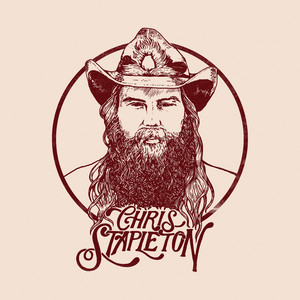

In [ ]:
# Test API connection
!rm -f test.jfif
test_uri = '5L0e8X6Mf9lfjs2miK2WUB'
album = sp.album(test_uri)
urllib.request.urlretrieve(album['images'][1]['url'], 'test.jfif')
img = Image.open('test.jfif')
img.show()

In [ ]:
!gdown 1gUK2113e6HtCP-NZGnrecmh_y7N-IPc6
Jukebox_artists = pd.read_csv('Jukebox_artists.csv', sep=';', header=None, 
                              names=['Jukebox name', 'index'], index_col='index')
Jukebox_artists.drop(index=[0, 7896, 7897], inplace=True)

artists['Jukebox name']  = Jukebox_artists['Jukebox name']

!mkdir albums

artists.tail()

Downloading...
From: https://drive.google.com/uc?id=1qNPJR-n-vcj5SSwMLbPtbk5-s9e6lOgf
To: /content/Artist_albums_full.csv
100% 19.5M/19.5M [00:00<00:00, 111MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1gUK2113e6HtCP-NZGnrecmh_y7N-IPc6
To: /content/Jukebox_artists.csv
100% 149k/149k [00:00<00:00, 67.5MB/s]


,Jukebox name,Spotify name,Spotify URI,Albums
index,,,,
7891,jamie lawson,jamielawson,spotify:artist:1jhdZdzOd4TJLAHqQdkUND,{'spotify:album:54vQHuNLb2W5K8e9vU6a8y': 'The ...
7892,rosanne cash,rosannecash,spotify:artist:6lx6XS8umFqYRVbBErx9fE,{'spotify:album:4lXDkMXaGTpeAeVT4ng2NZ': 'She ...
7893,walk off the earth,walkoffearth,spotify:artist:6jEiUoyyJNPHzSR0Nib6HX,{'spotify:album:6oUdTAKoVFhdHxXBma5Roe': 'Walk...
7894,scorpions,scorpions,spotify:artist:27T030eWyCQRmDyuvr1kxY,{'spotify:album:3buy6DvCMUseqKyEC4RI4g': 'Rock...
7895,kelly clarkson,kellyclarkson,spotify:artist:3BmGtnKgCSGYIUhmivXKWX,{'spotify:album:5sVFXIMrFRKBtDOexVlBBU': 'When...


In [ ]:
COLUMNS=['Genre', 'Artist', 'Album Name', 'URI', 'Image']

def get_albums(chunk):
    # Remake API connection to prevent timeout
    cred_mgr = SpotifyClientCredentials(client_id=clID4, client_secret=secret4)
    sp = spotipy.Spotify(client_credentials_manager=cred_mgr)
    
    full_albums = pd.DataFrame(columns=COLUMNS)
    has_genres = pd.DataFrame(columns=COLUMNS)
    # Since some artists don't have genres tagged, I set up two separate DataFrames.
    # full_albums will have info for every album we have.
    # has_genres will only include info if the album or artist has genres tagged.

    start = int((1000*chunk))
    end = min(int(1000*(chunk+1)), artists.shape[0])

    for num in range(start, end):
        row = artists.loc[num]
        artist_name = row['Jukebox name']
        artist_genres = sp.artist(row['Spotify URI'])['genres']
        info = []
        num_albums = len(row['Albums'])
        
        time.sleep(2)
        # To reduce the number of API calls, can batch up to 20 albums at a time.
        for idx in range(num_albums//20 + 1):
            albums = list(row['Albums'])[20*idx:20*(idx+1)]
            # If exactly 20 or 40 albums, will create a blank list
            if albums != []:
                album_list = sp.albums(albums)
            for album in album_list['albums']:
                # Remove singles and albums with no images
                if album is not None:
                    if album['album_type'] != 'single' and len(album['images'])>0:
                        album_name = album['name']
                        uri = album['uri']
                        # Second image is usually the right size, but grab the first if there's only 1
                        image = album['images'][min(1, len(album['images'])-1)]['url']
                        album_genres = album['genres']

                        # Many albums don't have genres tagged. In that case, take artist genres
                        if album_genres == []:
                            genres = artist_genres
                        else:
                            genres = album_genres
                        genres = ';'.join(genres)

                        info.append([genres, artist_name, album_name, uri, image])
        
        # Remove duplicates, including albums that are the same except for trailing parenthetical
        # e.g. Album name, Album name (remix), Album name (Taylor's edition)
        artist_df = pd.DataFrame(info, columns=COLUMNS)
        artist_df['Album Name'] = artist_df['Album Name'].str.replace(' ?\(.*\)$', '', regex=True)
        artist_df.drop_duplicates(subset='Album Name', inplace=True)

        # Some artists aren't tagged with genres. has_genres only includes albums with genre tags
        full_albums = pd.concat([full_albums, artist_df], axis=0, ignore_index=True)
        if artist_genres != []:
            has_genres = pd.concat([has_genres, artist_df], axis=0, ignore_index=True)
        
        # if num % 10 == 0:
        #     time.sleep(10)
        
        if num % 50 == 0:
            print(f'Done with {num}')
            full_albums.to_csv(f'albums/full_albums_{chunk}.csv')
            has_genres.to_csv(f'albums/has_genres_{chunk}.csv')

In [ ]:
chunks = [list(range(8))]
for chunk in chunks:
    print(f'********CHUNK {chunk} IN PROGRESS*******')
    get_albums(chunk)

In [ ]:
has_genres_super = pd.DataFrame(columns=COLUMNS)
for idx in range(8):
    fname = f'albums/has_genres_{idx}.csv'
    temp_df = pd.read_csv(fname, index_col=0)
    has_genres_super = pd.concat([has_genres_super, temp_df], axis=0, ignore_index=True)

In [ ]:
print(f'{has_genres_super.shape[0]} total songs')
print(f"{has_genres_super['Artist'].nunique()} unique artists")

155352 total songs
7163 unique artists


In [ ]:
has_genres_super.to_csv('has_genres_super.csv')

In [ ]:
full_albums_super = pd.DataFrame(columns=COLUMNS)
for idx in range(8):
    fname = f'albums/full_albums_{idx}.csv'
    temp_df = pd.read_csv(fname, index_col=0)
    full_albums_super = pd.concat([full_albums_super, temp_df], axis=0, ignore_index=True)

In [ ]:
print(f'{full_albums_super.shape[0]} total songs')
print(f"{full_albums_super['Artist'].nunique()} unique artists")

162000 total songs
7760 unique artists


In [ ]:
full_albums_super.to_csv('full_albums_super.csv')

In [ ]:
Jukebox_artists = pd.read_csv('Jukebox_artists.csv', sep=';', header=None, 
                              names=['Jukebox name', 'index'], index_col='index')
Jukebox_artists.head()

,Jukebox name
index,
1,beat farmers
2,aaron sprinkle
3,dianne reeves
4,lowe
5,harry manx


In [ ]:
matched_artists.head()

,Jukebox name,Spotify name,Spotify URI
index,,,
1,beatfarmers,beatfarmers,spotify:artist:66JcJ2bg4TKlGk2PPqlhgM
2,aaronsprinkle,aaronsprinkle,spotify:artist:3tTyMb425q0FBGdkPa6TGu
3,diannereeves,diannereeves,spotify:artist:7nwrblOf59ulOiB6djwPVh
5,harrymanx,harrymanx,spotify:artist:7JIDretlR52LyL3yvqr2kX
6,hailofbullets,hailofbullets,spotify:artist:19dZdBP69QTj8Jdgsde60c


In [ ]:
Jukebox_matched = Jukebox_artists.merge(matched_artists, left_index=True, right_index=True, suffixes=('', '_del'))
Jukebox_matched.drop(columns='Jukebox name_del', inplace=True)
Jukebox_matched.head(10)

,Jukebox name,Spotify name,Spotify URI
index,,,
1,beat farmers,beatfarmers,spotify:artist:66JcJ2bg4TKlGk2PPqlhgM
2,aaron sprinkle,aaronsprinkle,spotify:artist:3tTyMb425q0FBGdkPa6TGu
3,dianne reeves,diannereeves,spotify:artist:7nwrblOf59ulOiB6djwPVh
5,harry manx,harrymanx,spotify:artist:7JIDretlR52LyL3yvqr2kX
6,hail of bullets,hailofbullets,spotify:artist:19dZdBP69QTj8Jdgsde60c
7,ian gillan,iangillan,spotify:artist:4QCflfSOonkybNw5D7GqGk
8,andraé crouch,andraecrouch,spotify:artist:3pxLSxg8klHu1L9d93cpq7
9,widespread panic,widespreadpanic,spotify:artist:54SHZF2YS3W87xuJKSvOVf
11,misery index,miseryindex,spotify:artist:1kTUJy3zL57iEANLB9FpIA


In [ ]:
Jukebox_matched.to_csv('Jukebox_matched.csv', index_label='index')

In [ ]:
has_genres_fixed = has_genres_super.merge(Jukebox_matched, left_on='Artist', right_on='Jukebox name')
has_genres_fixed.rename(columns={'Unnamed: 0':'index'}, inplace=True)
has_genres_fixed.set_index('index', inplace=True)
has_genres_fixed.drop(columns=['Jukebox name'], inplace=True)

In [ ]:
has_genres_fixed.head()

,Genre,Artist,Album Name,URI,Image
index,,,,,
0,cowpunk;pub rock;roots rock,beat farmers,San Diego 1989,spotify:album:4XVW50Jscloo7DGqbTuxSI,https://i.scdn.co/image/ab67616d00001e0220e656...
1,cowpunk;pub rock;roots rock,beat farmers,Heading North 53 N° 8° E,spotify:album:0wk8LI6OGmJWivf6hKopeR,https://i.scdn.co/image/ab67616d00001e02b9ccc9...
2,cowpunk;pub rock;roots rock,beat farmers,Tales Of The New West,spotify:album:6toyhPRHSjBZYuBvorogOv,https://i.scdn.co/image/ab67616d00001e023ca375...
3,cowpunk;pub rock;roots rock,beat farmers,Best Of The Beat Farmers,spotify:album:4nI7uO3B7ja2n2Skm2H52G,https://i.scdn.co/image/ab67616d00001e02b459a4...
4,cowpunk;pub rock;roots rock,beat farmers,Loud and Plowed and... LIVE!,spotify:album:3DnGo1DUDP3O0Cynpplb1B,https://i.scdn.co/image/ab67616d00001e02df50b5...


In [ ]:
has_genres_fixed.shape

(143109, 5)

In [ ]:
has_genres_fixed['Artist'].nunique()

6573

In [ ]:
has_genres_fixed.to_csv('has_genres_fixed.csv')

# Count number of artists associated with each genre

In [ ]:
artists.drop(index=[7896, 7897], inplace=True)
artists.tail()

,Jukebox name,Spotify name,Spotify URI,Albums
index,,,,
7891,jamielawson,jamielawson,spotify:artist:1jhdZdzOd4TJLAHqQdkUND,{'spotify:album:54vQHuNLb2W5K8e9vU6a8y': 'The ...
7892,rosannecash,rosannecash,spotify:artist:6lx6XS8umFqYRVbBErx9fE,{'spotify:album:4lXDkMXaGTpeAeVT4ng2NZ': 'She ...
7893,walkoffearth,walkoffearth,spotify:artist:6jEiUoyyJNPHzSR0Nib6HX,{'spotify:album:6oUdTAKoVFhdHxXBma5Roe': 'Walk...
7894,scorpions,scorpions,spotify:artist:27T030eWyCQRmDyuvr1kxY,{'spotify:album:3buy6DvCMUseqKyEC4RI4g': 'Rock...
7895,kellyclarkson,kellyclarkson,spotify:artist:3BmGtnKgCSGYIUhmivXKWX,{'spotify:album:5sVFXIMrFRKBtDOexVlBBU': 'When...


In [ ]:
artists['Genres'] = [list() for idx in range(artists.shape[0])]
artists.head()

,Jukebox name,Spotify name,Spotify URI,Albums,Genres
index,,,,,
1,beatfarmers,beatfarmers,spotify:artist:66JcJ2bg4TKlGk2PPqlhgM,{'spotify:album:4XVW50Jscloo7DGqbTuxSI': 'San ...,[]
2,aaronsprinkle,aaronsprinkle,spotify:artist:3tTyMb425q0FBGdkPa6TGu,{'spotify:album:1xRI7oLmU3qaEEijA8Ieu6': 'Inst...,[]
3,diannereeves,diannereeves,spotify:artist:7nwrblOf59ulOiB6djwPVh,{'spotify:album:36Xed6vrAMhsGEmxcY25wT': 'Berk...,[]
4,lowe,lowertown,spotify:artist:1yI0RRPnOA9BFJmiZ6cEzw,{'spotify:album:38qy52coTmsTa90EOWeJLx': 'I Lo...,[]
5,harrymanx,harrymanx,spotify:artist:7JIDretlR52LyL3yvqr2kX,{'spotify:album:1SAEpdXZ6O6P6FQda1IIzq': 'Fait...,[]


In [ ]:
for idx in range(1, artists.shape[0]):
    artist = sp.artist(artists.loc[idx, 'Spotify URI'])
    genres = artist['genres']
    artists.loc[idx, 'Genres'].extend(genres)
    if idx % 500 == 0:
        print(f'Done with {idx}')

Done with 500
Done with 1000
Done with 1500
Done with 2000
Done with 2500
Done with 3000
Done with 3500
Done with 4000
Done with 4500
Done with 5000
Done with 5500
Done with 6000
Done with 6500
Done with 7000
Done with 7500


In [ ]:
artists.head()

,Jukebox name,Spotify name,Spotify URI,Albums,Genres
index,,,,,
1,beatfarmers,beatfarmers,spotify:artist:66JcJ2bg4TKlGk2PPqlhgM,{'spotify:album:4XVW50Jscloo7DGqbTuxSI': 'San ...,"[cowpunk, pub rock, roots rock, cowpunk, pub r..."
2,aaronsprinkle,aaronsprinkle,spotify:artist:3tTyMb425q0FBGdkPa6TGu,{'spotify:album:1xRI7oLmU3qaEEijA8Ieu6': 'Inst...,[]
3,diannereeves,diannereeves,spotify:artist:7nwrblOf59ulOiB6djwPVh,{'spotify:album:36Xed6vrAMhsGEmxcY25wT': 'Berk...,"[contemporary vocal jazz, vocal jazz]"
4,lowe,lowertown,spotify:artist:1yI0RRPnOA9BFJmiZ6cEzw,{'spotify:album:38qy52coTmsTa90EOWeJLx': 'I Lo...,"[indie pop, lo-fi indie]"
5,harrymanx,harrymanx,spotify:artist:7JIDretlR52LyL3yvqr2kX,{'spotify:album:1SAEpdXZ6O6P6FQda1IIzq': 'Fait...,"[canadian folk, country blues, isle of man indie]"


In [ ]:
artists.tail()

,Jukebox name,Spotify name,Spotify URI,Albums,Genres
index,,,,,
7891,jamielawson,jamielawson,spotify:artist:1jhdZdzOd4TJLAHqQdkUND,{'spotify:album:54vQHuNLb2W5K8e9vU6a8y': 'The ...,"[devon indie, neo mellow]"
7892,rosannecash,rosannecash,spotify:artist:6lx6XS8umFqYRVbBErx9fE,{'spotify:album:4lXDkMXaGTpeAeVT4ng2NZ': 'She ...,"[country, country rock, folk, lilith, mellow g..."
7893,walkoffearth,walkoffearth,spotify:artist:6jEiUoyyJNPHzSR0Nib6HX,{'spotify:album:6oUdTAKoVFhdHxXBma5Roe': 'Walk...,"[canadian rock, pop rock]"
7894,scorpions,scorpions,spotify:artist:27T030eWyCQRmDyuvr1kxY,{'spotify:album:3buy6DvCMUseqKyEC4RI4g': 'Rock...,"[album rock, german hard rock, german metal, g..."
7895,kellyclarkson,kellyclarkson,spotify:artist:3BmGtnKgCSGYIUhmivXKWX,{'spotify:album:5sVFXIMrFRKBtDOexVlBBU': 'When...,"[dance pop, pop, post-teen pop, talent show]"


In [ ]:
genres_list = list(artists['Genres'])
from functools import reduce
genres_list = reduce(lambda a,b:a+b, genres_list)
genres_list[:10]

['cowpunk',
 'pub rock',
 'roots rock',
 'cowpunk',
 'pub rock',
 'roots rock',
 'contemporary vocal jazz',
 'vocal jazz',
 'indie pop',
 'lo-fi indie']

In [ ]:
df2 = pd.DataFrame(genre_counts.most_common(), columns=['Genre', 'Num of artists'])
df2

,Genre,Num of artists
0,rock,383
1,classic rock,316
2,mellow gold,308
3,country rock,303
4,dance pop,302
...,...,...
2176,bass house,1
2177,modern bollywood,1
2178,melodic drill,1
2179,sunnlensk tonlist,1


In [ ]:
df2.to_csv('Genre counts.csv')
files.download('Genre counts.csv')

# Show some albums

In [ ]:
!gdown '1Z5eh9PFHCc1mZ9cipeH9Ic_r6rvm7uYU'
artists = pd.read_csv('Artist_albums.csv', index_col='index', converters={'Albums':literal_eval})
artists.head()

Downloading...
From: https://drive.google.com/uc?id=1Z5eh9PFHCc1mZ9cipeH9Ic_r6rvm7uYU
To: /content/Artist_albums.csv
100% 9.62M/9.62M [00:00<00:00, 180MB/s]


,Jukebox name,Spotify name,Spotify URI,Albums
index,,,,
1,beatfarmers,beatfarmers,spotify:artist:66JcJ2bg4TKlGk2PPqlhgM,{'spotify:album:4XVW50Jscloo7DGqbTuxSI': 'San ...
2,aaronsprinkle,aaronsprinkle,spotify:artist:3tTyMb425q0FBGdkPa6TGu,{'spotify:album:1xRI7oLmU3qaEEijA8Ieu6': 'Inst...
3,diannereeves,diannereeves,spotify:artist:7nwrblOf59ulOiB6djwPVh,{'spotify:album:36Xed6vrAMhsGEmxcY25wT': 'Berk...
4,lowe,lowertown,spotify:artist:1yI0RRPnOA9BFJmiZ6cEzw,{'spotify:album:38qy52coTmsTa90EOWeJLx': 'I Lo...
5,harrymanx,harrymanx,spotify:artist:7JIDretlR52LyL3yvqr2kX,{'spotify:album:1SAEpdXZ6O6P6FQda1IIzq': 'Fait...


In [ ]:
artists.loc[7895, 'Albums']

"{'spotify:album:5sVFXIMrFRKBtDOexVlBBU': 'When Christmas Comes Around...', 'spotify:album:6GBu7GU6dztLYlZuUHiwA2': 'Meaning of Life', 'spotify:album:2puALR81qCmKmbOyuHAI94': 'Piece By Piece (Deluxe Version)', 'spotify:album:2evDrP61AuZ2G1p9XkEGDB': 'Piece By Piece', 'spotify:album:7oKtXc3FkeOZTCB88YugON': 'Piece By Piece (Deluxe Version)', 'spotify:album:0ccJYENQpzoy98XNBDwIVO': 'Wrapped In Red (Deluxe Version)', 'spotify:album:7Jahqd1kx9Qau0E9x9iZj6': 'Wrapped In Red', 'spotify:album:0t70lpfTyHEv0uuq21fhdZ': 'Wrapped In Red', 'spotify:album:1Iqhigu4rrELLMXI4RRuh9': 'Stronger (Deluxe Version)', 'spotify:album:0VmE95pr5TSpZWucfyhO5e': 'Stronger (Deluxe Version)', 'spotify:album:1MNvMtEmMMdBXZBDcFNcWj': 'Stronger (Deluxe Version)', 'spotify:album:0RkzvNjxyp5qzMcWeuBTA2': 'Stronger (Track by Track)', 'spotify:album:1vpJHjovGZZNhiQPHorntg': 'All I Ever Wanted', 'spotify:album:7KQy2pkGubHDzaTnPmX1oo': 'All I Ever Wanted', 'spotify:album:4h8seeFAi6iYhslcWIxTSG': 'All I Ever Wanted', 'spotif

In [ ]:
alname = sp.album(list(artists.loc[7895, 'Albums'])[0])['name']
alurl = sp.album(list(artists.loc[7895, 'Albums'])[0])['images'][1]['url']

In [ ]:
albums = artists['Albums'].sample().values[0]
for idx, uri in albums.items():
    print(idx, uri)

spotify:album:3bNmQxUHeb14nG9y3sxjqD Comalies XX
spotify:album:66otdwZMfDMVc68Rvq3C6x Live From The Apocalypse
spotify:album:2Op5m54XfuEqqXYRG0435d Black Anima (Bonus Tracks Version)
spotify:album:75bAr1OZeJ4OVX2v18CHeS The 119 Show - Live In London
spotify:album:5ddVEy5XVXrK6fEL0jNLYs Delirium
spotify:album:6P5nvFW7lUOwGGvDNYuVvG Broken Crown Halo
spotify:album:7m9ZCS7eFROU7vCrE5hIW6 Dark Adrenaline
spotify:album:7kitcTV4f9h0cvH6NaNqH0 Shallow Life
spotify:album:4ohv4QXuyaJNGRvShTM84t Visual Karma (Body, Mind and Soul) - Live at Wacken 2007
spotify:album:7rMen6gw9hrmDuZNH1iUfT Karmacode
spotify:album:4pPjBhZFubAGdhIVTSj8VG The Eps- Lacuna Coil/halflife
spotify:album:3FQgJtOcKfuTlRkKIkCAV2 Unleashed Memories (Re-Release + Bonus)
spotify:album:3enHNe0hzlAxYlsdRxljQn Comalies (Deluxe Edition)
spotify:album:1zFvNbQjRGiCalBnPzUEyN Comalies
spotify:album:3OGMfNOHgqT5KQeOrESXbG In a Reverie
spotify:album:6FkY7M23Zqy1MrRYJJJals Swamped XX
spotify:album:7l8G0xgVOBgfYTYDrqmL4D Tight Rope XX
spo

In [ ]:
row = artists.sample()
artist = sp.artist(row['Spotify URI'].values[0])
print(artist['name'])
print(artist['genres'])

Circle II Circle
['neo classical metal', 'power metal', 'progressive metal', 'progressive power metal']


In [ ]:
def show_artist():
    # row = artists.sample()
    row = artists[artists['Jukebox name']=='taylorswift']
    albums = row['Albums'].values[0]
    print(len(albums))
    print(row['Jukebox name'])
    idx = 0
    fig, ax = plt.subplots(nrows=len(albums)//10+1, ncols=min(10, len(albums)))
    for axi in ax:
        for axj in axi:
            axj.axis(False)
    for uri in albums:
        url = sp.album(uri)['images'][1]['url']
        urllib.request.urlretrieve(url, f'images/img{idx}.jfif')
        img = Image.open(f'images/img{idx}.jfif')
        ax[idx//10, idx%10].imshow(img)
        idx += 1
    print([value for value in albums.values()])

20
index
6841    taylorswift
Name: Jukebox name, dtype: object
['Midnights (3am Edition)', 'Midnights (3am Edition)', 'Midnights', 'Midnights', "Red (Taylor's Version)", "Red (Taylor's Version)", "Fearless (Taylor's Version)", 'evermore (deluxe version)', 'evermore (deluxe version)', 'evermore', 'evermore', 'evermore', 'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]', 'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]', 'folklore (deluxe version)', 'folklore (deluxe version)', 'folklore', 'folklore', 'Lover', 'Taylor Swift Karaoke: reputation']


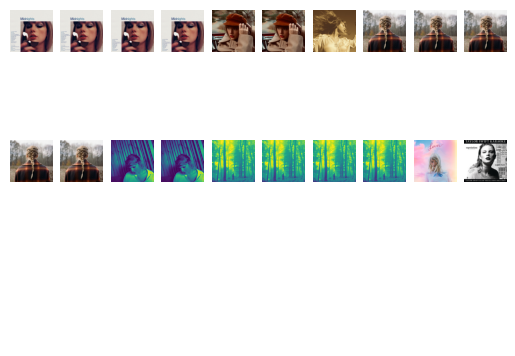

In [ ]:
!rm -r images
!mkdir images
show_artist()

In [ ]:
final_parent_genres_super = pd.read_excel('final_parent_genres_super.xlsx', index_col='Unnamed: 0')
final_parent_genres_super.head()

,Genre,Artist,Album Name,URI,Image,Selected_Parent_Genre
Unnamed: 0,,,,,,
0,"['cowpunk', 'pub rock', 'roots rock']",beat farmers,San Diego 1989,spotify:album:4XVW50Jscloo7DGqbTuxSI,https://i.scdn.co/image/ab67616d00001e0220e656...,rock
1,"['cowpunk', 'pub rock', 'roots rock']",beat farmers,Heading North 53 NÂ° 8Â° E,spotify:album:0wk8LI6OGmJWivf6hKopeR,https://i.scdn.co/image/ab67616d00001e02b9ccc9...,rock
2,"['cowpunk', 'pub rock', 'roots rock']",beat farmers,Tales Of The New West,spotify:album:6toyhPRHSjBZYuBvorogOv,https://i.scdn.co/image/ab67616d00001e023ca375...,rock
3,"['cowpunk', 'pub rock', 'roots rock']",beat farmers,Best Of The Beat Farmers,spotify:album:4nI7uO3B7ja2n2Skm2H52G,https://i.scdn.co/image/ab67616d00001e02b459a4...,rock
4,"['cowpunk', 'pub rock', 'roots rock']",beat farmers,Loud and Plowed and... LIVE!,spotify:album:3DnGo1DUDP3O0Cynpplb1B,https://i.scdn.co/image/ab67616d00001e02df50b5...,rock


In [ ]:
Jukebox_matched = pd.read_csv('Jukebox_matched.csv', index_col='index')
Jukebox_matched.head()

,Jukebox name,Spotify name,Spotify URI
index,,,
1,beat farmers,beatfarmers,spotify:artist:66JcJ2bg4TKlGk2PPqlhgM
2,aaron sprinkle,aaronsprinkle,spotify:artist:3tTyMb425q0FBGdkPa6TGu
3,dianne reeves,diannereeves,spotify:artist:7nwrblOf59ulOiB6djwPVh
5,harry manx,harrymanx,spotify:artist:7JIDretlR52LyL3yvqr2kX
6,hail of bullets,hailofbullets,spotify:artist:19dZdBP69QTj8Jdgsde60c


In [ ]:
final_parent_genres_fixed = final_parent_genres_super.merge(Jukebox_matched, left_on='Artist', right_on='Jukebox name')
final_parent_genres_fixed = final_parent_genres_fixed[final_parent_genres_super.columns]
final_parent_genres_fixed

,Genre,Artist,Album Name,URI,Image,Selected_Parent_Genre
0,"['cowpunk', 'pub rock', 'roots rock']",beat farmers,San Diego 1989,spotify:album:4XVW50Jscloo7DGqbTuxSI,https://i.scdn.co/image/ab67616d00001e0220e656...,rock
1,"['cowpunk', 'pub rock', 'roots rock']",beat farmers,Heading North 53 NÂ° 8Â° E,spotify:album:0wk8LI6OGmJWivf6hKopeR,https://i.scdn.co/image/ab67616d00001e02b9ccc9...,rock
2,"['cowpunk', 'pub rock', 'roots rock']",beat farmers,Tales Of The New West,spotify:album:6toyhPRHSjBZYuBvorogOv,https://i.scdn.co/image/ab67616d00001e023ca375...,rock
3,"['cowpunk', 'pub rock', 'roots rock']",beat farmers,Best Of The Beat Farmers,spotify:album:4nI7uO3B7ja2n2Skm2H52G,https://i.scdn.co/image/ab67616d00001e02b459a4...,rock
4,"['cowpunk', 'pub rock', 'roots rock']",beat farmers,Loud and Plowed and... LIVE!,spotify:album:3DnGo1DUDP3O0Cynpplb1B,https://i.scdn.co/image/ab67616d00001e02df50b5...,rock
...,...,...,...,...,...,...
136502,['neo-synthpop'],b! machine,Hybrid,spotify:album:20CBXqtAsib9BpcBWLvoIf,https://i.scdn.co/image/ab67616d00001e024ee561...,pop
136503,['neo-synthpop'],b! machine,Opal,spotify:album:5ybip8OOfB1HztE6x8PUVL,https://i.scdn.co/image/ab67616d00001e020059ca...,pop
136504,['neo-synthpop'],b! machine,Infinity Plus,spotify:album:0mvsKkpMNkxqE7jpfqcA43,https://i.scdn.co/image/ab67616d00001e022c8047...,pop
136505,['neo-synthpop'],b! machine,Aftermath,spotify:album:4EOt7z1j5Y61JiAvBCkA9Y,https://i.scdn.co/image/ab67616d00001e02b61020...,pop
